<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/path_planning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

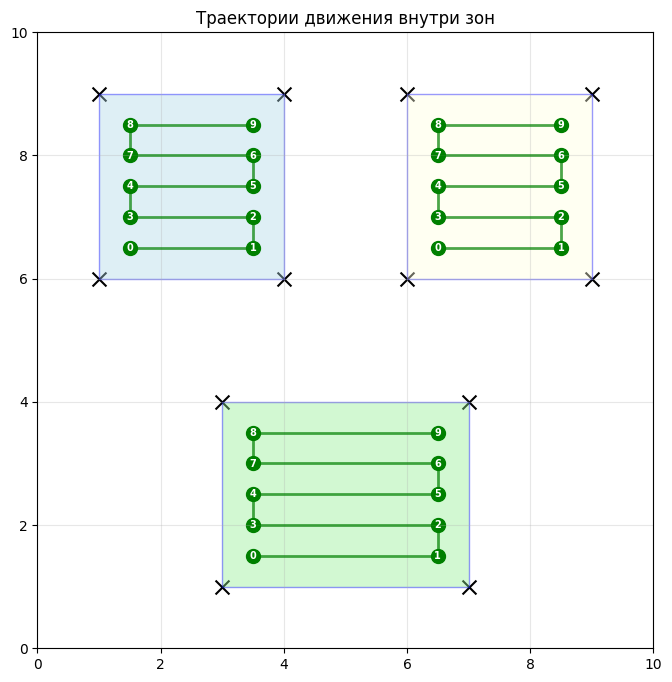


=== ЗОНА 1 (цвет: lightblue) ===
Всего точек в зоне 1: 10
Координаты точек в порядке змейки:
Точка 0: (1.5, 6.5)
Точка 1: (3.5, 6.5)
Точка 2: (3.5, 7.0)
Точка 3: (1.5, 7.0)
Точка 4: (1.5, 7.5)
Точка 5: (3.5, 7.5)
Точка 6: (3.5, 8.0)
Точка 7: (1.5, 8.0)
Точка 8: (1.5, 8.5)
Точка 9: (3.5, 8.5)

=== ЗОНА 2 (цвет: lightyellow) ===
Всего точек в зоне 2: 10
Координаты точек в порядке змейки:
Точка 0: (6.5, 6.5)
Точка 1: (8.5, 6.5)
Точка 2: (8.5, 7.0)
Точка 3: (6.5, 7.0)
Точка 4: (6.5, 7.5)
Точка 5: (8.5, 7.5)
Точка 6: (8.5, 8.0)
Точка 7: (6.5, 8.0)
Точка 8: (6.5, 8.5)
Точка 9: (8.5, 8.5)

=== ЗОНА 3 (цвет: lightgreen) ===
Всего точек в зоне 3: 10
Координаты точек в порядке змейки:
Точка 0: (3.5, 1.5)
Точка 1: (6.5, 1.5)
Точка 2: (6.5, 2.0)
Точка 3: (3.5, 2.0)
Точка 4: (3.5, 2.5)
Точка 5: (6.5, 2.5)
Точка 6: (6.5, 3.0)
Точка 7: (3.5, 3.0)
Точка 8: (3.5, 3.5)
Точка 9: (6.5, 3.5)


In [128]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

class TrajectoryPlanner:
    def __init__(self, distance_from_border=0.5, step_y=0.5):
        self.distance_from_border = distance_from_border
        self.step_y = step_y

    def generate_trajectory(self, obstacles):
        """Генерирует траекторию змейкой внутри квадрата"""
        # Создаем полигон
        polygon = patches.Polygon(obstacles, closed=True, alpha=0.3, color='blue')

        # Генерируем точки змейкой внутри квадрата
        x_min, x_max = obstacles[:, 0].min(), obstacles[:, 0].max()
        y_min, y_max = obstacles[:, 1].min(), obstacles[:, 1].max()

        # Создаем координаты по осям с отступами
        x_coords = np.array([x_min + self.distance_from_border, x_max - self.distance_from_border])
        y_coords = np.arange(y_min + self.distance_from_border, y_max, self.step_y)

        # Генерируем точки змейкой
        points = []
        for i, y in enumerate(y_coords):
            if i % 2 == 0:  # Четные строки - слева направо
                for x in x_coords:
                    points.append([x, y])
            else:  # Нечетные строки - справа налево
                for x in reversed(x_coords):
                    points.append([x, y])

        points = np.array(points)

        # Фильтруем точки внутри полигона
        inner_points = points[polygon.get_path().contains_points(points)]

        return inner_points, polygon

def get_random_light_color():
    """Генерирует случайный светлый цвет"""
    colors = ['lightpink', 'lightblue', 'lightyellow', 'lightgreen', 'lightcyan',
              'lavender', 'peachpuff', 'paleturquoise', 'lemonchiffon', 'mistyrose']
    return random.choice(colors)

# Создаем планировщик траектории
planner = TrajectoryPlanner(distance_from_border=0.5, step_y=0.5)

# Список квадратов препятствий (3 зоны без перекрытия)
obstacles_list = [
    np.array([[1, 6], [4, 6], [4, 9], [1, 9]]),    # Первая зона (уменьшена и перемещена)
    np.array([[6, 6], [9, 6], [9, 9], [6, 9]]),    # Вторая зона
    np.array([[3, 1], [7, 1], [7, 4], [3, 4]])     # Третья зона
]

# Генерируем случайные светлые цвета для полигонов
polygon_colors = [get_random_light_color() for _ in range(len(obstacles_list))]

# Создаем график
fig, ax = plt.subplots(figsize=(8, 8))

# Обрабатываем каждую зону
all_trajectories = []
for i, obstacles in enumerate(obstacles_list):
    # Генерируем траекторию для текущей зоны
    points, polygon = planner.generate_trajectory(obstacles)

    # Меняем цвет полигона на случайный светлый
    polygon.set_facecolor(polygon_colors[i])
    polygon.set_alpha(0.4)

    all_trajectories.append(points)

    # Отображаем препятствия
    ax.scatter(obstacles[:, 0], obstacles[:, 1], color='black', marker='x', s=100)

    # Добавляем полигон
    ax.add_patch(polygon)

    # Отображаем точки и траекторию (все зеленым)
    if len(points) > 0:
        ax.scatter(points[:, 0], points[:, 1], color='green', s=100)
        ax.plot(points[:, 0], points[:, 1], color='green', linewidth=2, alpha=0.7)

        # Добавляем нумерацию точек
        for j, point in enumerate(points):
            ax.text(point[0], point[1], str(j), fontsize=7, ha='center',
                    va='center', color='white', weight='bold')

# Настройки отображения
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.grid(True, alpha=0.3)
ax.set_title('Траектории движения внутри зон')
ax.set_aspect('equal')

plt.show()

# Выводим информацию о точках для каждой зоны
for i, trajectory in enumerate(all_trajectories):
    print(f"\n=== ЗОНА {i+1} (цвет: {polygon_colors[i]}) ===")
    print(f"Всего точек в зоне {i+1}: {len(trajectory)}")
    print("Координаты точек в порядке змейки:")
    for j, point in enumerate(trajectory):
        print(f"Точка {j}: ({point[0]:.1f}, {point[1]:.1f})")